## Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

## Hypothesis  Generation
Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):
* Salary: Applicants with high income should have more chances of loan approval.
* Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
* Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* Loan term: Loan for less time period and less amount should have higher chances of approval.
* EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [1]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading data
train = pd.read_csv('Loan_Train.csv')
test = pd.read_csv('Loan_Test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
# Cheking information about features
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

In [5]:
#Checkeing null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
# Checking Target variable
print(train['Loan_Status'].value_counts())
train['Loan_Status'].value_counts(normalize=True).mul(100)

Y    422
N    192
Name: Loan_Status, dtype: int64


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

## Target Variable
The loan of 422(around 69%) people out of 614 was approved

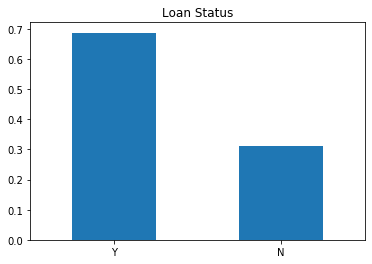

In [8]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan Status',rot=0)
plt.show()

## Independent Variable
### 1. Independent Variable (Categorical)
It can be inferred from the below bar plots that:
* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.

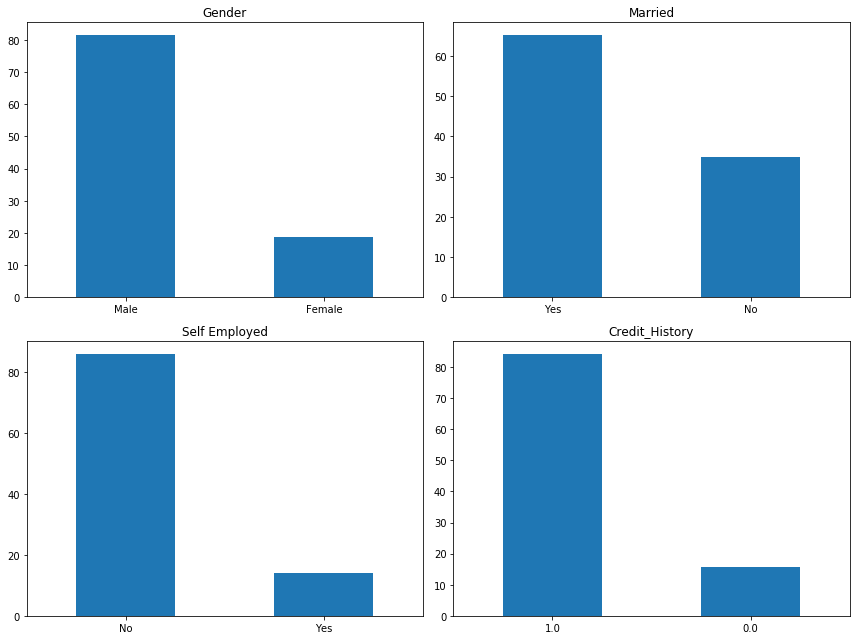

In [9]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).mul(100).plot.bar(figsize =(12,9),title='Gender',rot=0)
plt.subplot(222)
train['Married'].value_counts(normalize=True).mul(100).plot.bar(figsize =(12,9),title='Married',rot=0)
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).mul(100).plot.bar(figsize =(12,9),title='Self Employed',rot=0)
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).mul(100).plot.bar(figsize =(12,9),title='Credit_History',rot=0)
plt.tight_layout()
plt.show()

### 2. Independent Variable (Ordinal)
Following inferences can be made from the below bar plots:
* Most of the applicants don’t have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

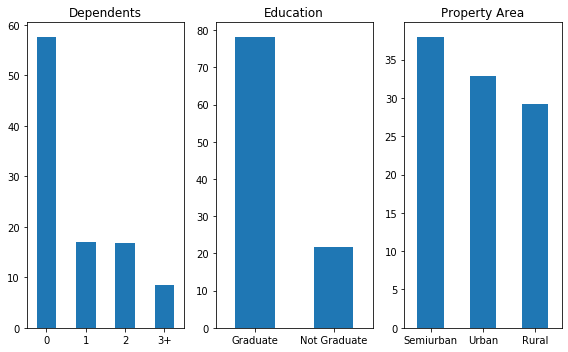

In [10]:
plt.figure()
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).mul(100).plot.bar(figsize =(8,5),title = 'Dependents',rot=0)
plt.subplot(132)
train['Education'].value_counts(normalize=True).mul(100).plot.bar(figsize =(8,5),title = 'Education',rot=0)
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).mul(100).plot.bar(figsize =(8,5),title = 'Property Area',rot=0)
plt.tight_layout()
plt.show()

## Independent Variable (Numerical)
### 1. ApplicantIncome

* It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed
* The boxplot confirms the presence of a lot of outliers/extreme values

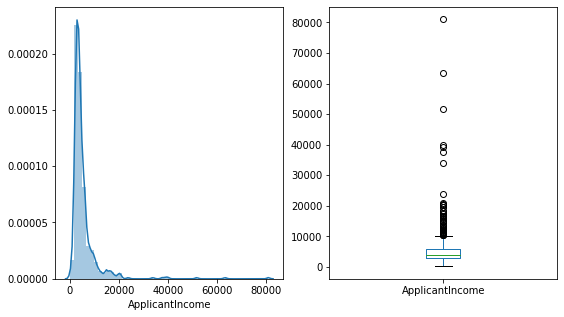

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(9,5))
plt.show()

### Let us segregate ApplicantIncome them by Education
We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

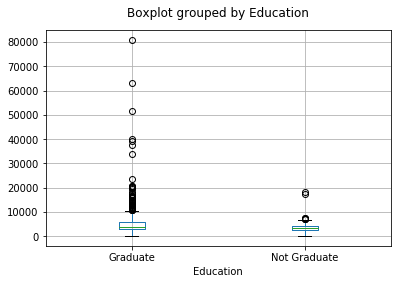

In [12]:
train.boxplot(column ='ApplicantIncome',by ='Education')
plt.title('')
plt.show()

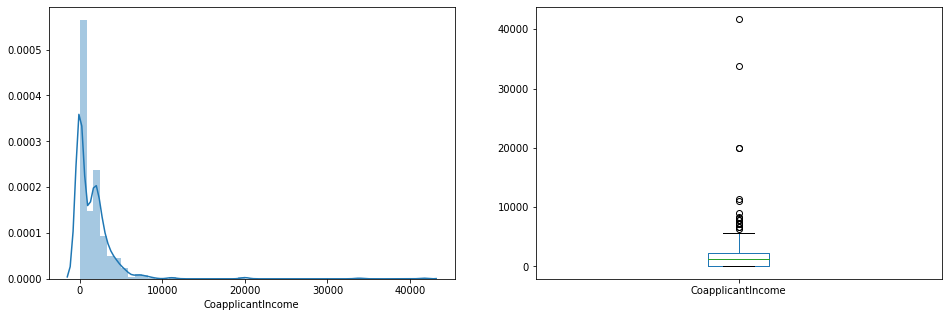

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

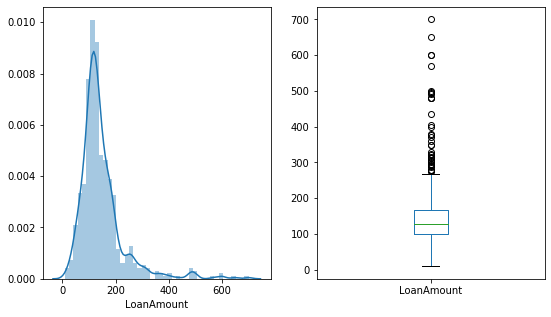

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(9,5))
plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


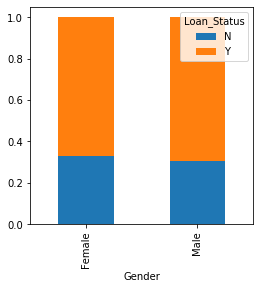

In [15]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
print(gender)
gender.div(gender.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize =(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

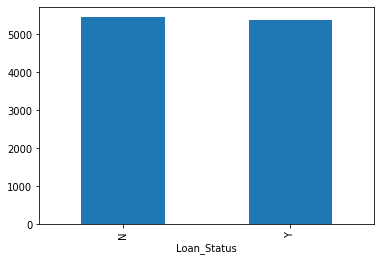

In [16]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

In [17]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [18]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [19]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
train['Loan_Amount_Term'].astype('float')

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [21]:
train['Credit_History'].astype('category')
test['Credit_History'].astype('category')

0      1.0
1      1.0
2      1.0
3      NaN
4      1.0
      ... 
362    1.0
363    1.0
364    NaN
365    1.0
366    1.0
Name: Credit_History, Length: 367, dtype: category
Categories (2, float64): [0.0, 1.0]

In [22]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

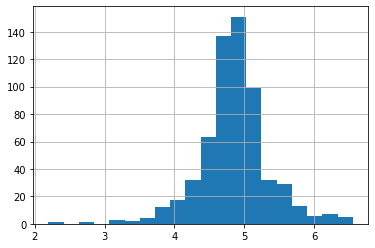

In [23]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [24]:
train = train.drop(['Loan_ID','LoanAmount'],axis=1)
test = test.drop(['Loan_ID','LoanAmount'],axis=1)


In [25]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [26]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=200)

In [29]:
ls = LogisticRegression()
ls.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = ls.predict(x_cv)

In [31]:
print(accuracy_score(y_cv,y_pred))
print(classification_report(y_cv,y_pred))

0.7945945945945946
              precision    recall  f1-score   support

           N       0.89      0.42      0.57        60
           Y       0.78      0.98      0.87       125

    accuracy                           0.79       185
   macro avg       0.83      0.70      0.72       185
weighted avg       0.81      0.79      0.77       185



In [32]:
from sklearn.model_selection import StratifiedKFold
i = 1
l_score=[]
kf = StratifiedKFold(n_splits=8,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kflod'.format(i,kf.n_splits))
    xtr,xval = X.loc[train_index],X.loc[test_index]
    ytr,yval = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    val_predict = model.predict(xval)
    score = accuracy_score(yval,val_predict)
    l_score.append(score)
    print('Accuracy Score',score)
    pred_test = model.predict(test)
    i+=1
    pred = model.predict_proba(xval)[:,1]    
print(np.mean(l_score))    


1 of kflod
Accuracy Score 0.8051948051948052

2 of kflod
Accuracy Score 0.8181818181818182

3 of kflod
Accuracy Score 0.8311688311688312

4 of kflod
Accuracy Score 0.8311688311688312

5 of kflod
Accuracy Score 0.7662337662337663

6 of kflod
Accuracy Score 0.8311688311688312

7 of kflod
Accuracy Score 0.8289473684210527

8 of kflod
Accuracy Score 0.7763157894736842
0.8110475051264525


In [33]:
submission = pd.read_csv('sample_submission.csv')
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [34]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logist.csv')